## Using Historical Data API

In [52]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

In [53]:
hist_data_url = 'https://api.jsonserve.com/XgAgFJ'
hist_data = requests.get(hist_data_url).json()

hist_data

[{'id': 336497,
  'quiz_id': 51,
  'user_id': 'YcDFSO4ZukTJnnFMgRNVwZTE4j42',
  'submitted_at': '2025-01-17T15:30:18.027+05:30',
  'created_at': '2025-01-17T15:30:18.044+05:30',
  'updated_at': '2025-01-17T15:30:18.044+05:30',
  'score': 108,
  'trophy_level': 2,
  'accuracy': '90 %',
  'speed': '100',
  'final_score': '105.0',
  'negative_score': '3.0',
  'correct_answers': 27,
  'incorrect_answers': 3,
  'source': 'exam',
  'type': 'topic',
  'started_at': '2025-01-17T15:18:30.000+05:30',
  'ended_at': '2025-01-17T15:30:15.000+05:30',
  'duration': '15:00',
  'better_than': 107,
  'total_questions': 100,
  'rank_text': 'Topic Rank - #-171',
  'mistakes_corrected': 9,
  'initial_mistake_count': 12,
  'response_map': {'2523': 10109,
   '2529': 10130,
   '2533': 10149,
   '2534': 10151,
   '2535': 10155,
   '2537': 10163,
   '2538': 10169,
   '2541': 10178,
   '2543': 10187,
   '2550': 10216,
   '2553': 10227,
   '2554': 10232,
   '2555': 10235,
   '2557': 10242,
   '2558': 10246,
   '2

In [54]:
data_lst = []
for res in hist_data:
    topic = res['quiz']['topic']
    accuracy = res['accuracy']
    final_score = res['final_score']
    date_of_test = res['quiz']['daily_date']

    data_lst.append([topic, accuracy, final_score, date_of_test])

hist_data = pd.DataFrame(data_lst[::-1], columns=['topic', 'acc', 'score', 'date'])
hist_data

,topic,acc,score,date
0,Respiration and Gas Exchange,66 %,21.0,"January 17, 2025"
1,Reproductive Health,43 %,35.0,"January 17, 2025"
2,reproductive health,84 %,61.0,"January 17, 2025"
3,human health and disease,93 %,110.0,"January 17, 2025"
4,reproductive health,100 %,40.0,"January 17, 2025"
5,microbes in human welfare,100 %,76.0,"January 17, 2025"
6,principles of inheritance and variation,30 %,5.0,"January 17, 2025"
7,Body Fluids and Circulation,50 %,27.0,"January 17, 2025"
8,Human Reproduction,38 %,24.0,"January 17, 2025"
9,Body Fluids and Circulation,31 %,16.0,"January 17, 2025"


In [55]:
hist_data['acc'] = hist_data['acc'].str.replace(' %', '').astype(int)
hist_data['date'] = pd.to_datetime(hist_data['date'])
hist_data['score'] = hist_data['score'].astype('float16')

hist_data

c:\Users\ayumh\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,topic,acc,score,date
0,Respiration and Gas Exchange,66,21.0,2025-01-17
1,Reproductive Health,43,35.0,2025-01-17
2,reproductive health,84,61.0,2025-01-17
3,human health and disease,93,110.0,2025-01-17
4,reproductive health,100,40.0,2025-01-17
5,microbes in human welfare,100,76.0,2025-01-17
6,principles of inheritance and variation,30,5.0,2025-01-17
7,Body Fluids and Circulation,50,27.0,2025-01-17
8,Human Reproduction,38,24.0,2025-01-17
9,Body Fluids and Circulation,31,16.0,2025-01-17


In [56]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   topic   14 non-null     object        
 1   acc     14 non-null     int64         
 2   score   14 non-null     float16       
 3   date    14 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float16(1), int64(1), object(1)
memory usage: 496.0+ bytes


In [57]:
topics = hist_data.topic.unique()
topics

array(['Respiration and Gas Exchange', 'Reproductive Health',
       'reproductive health ', 'human health and disease ',
       'microbes in human welfare',
       'principles of inheritance and variation ',
       'Body Fluids and Circulation ', 'Human Reproduction',
       'Body Fluids and Circulation'], dtype=object)

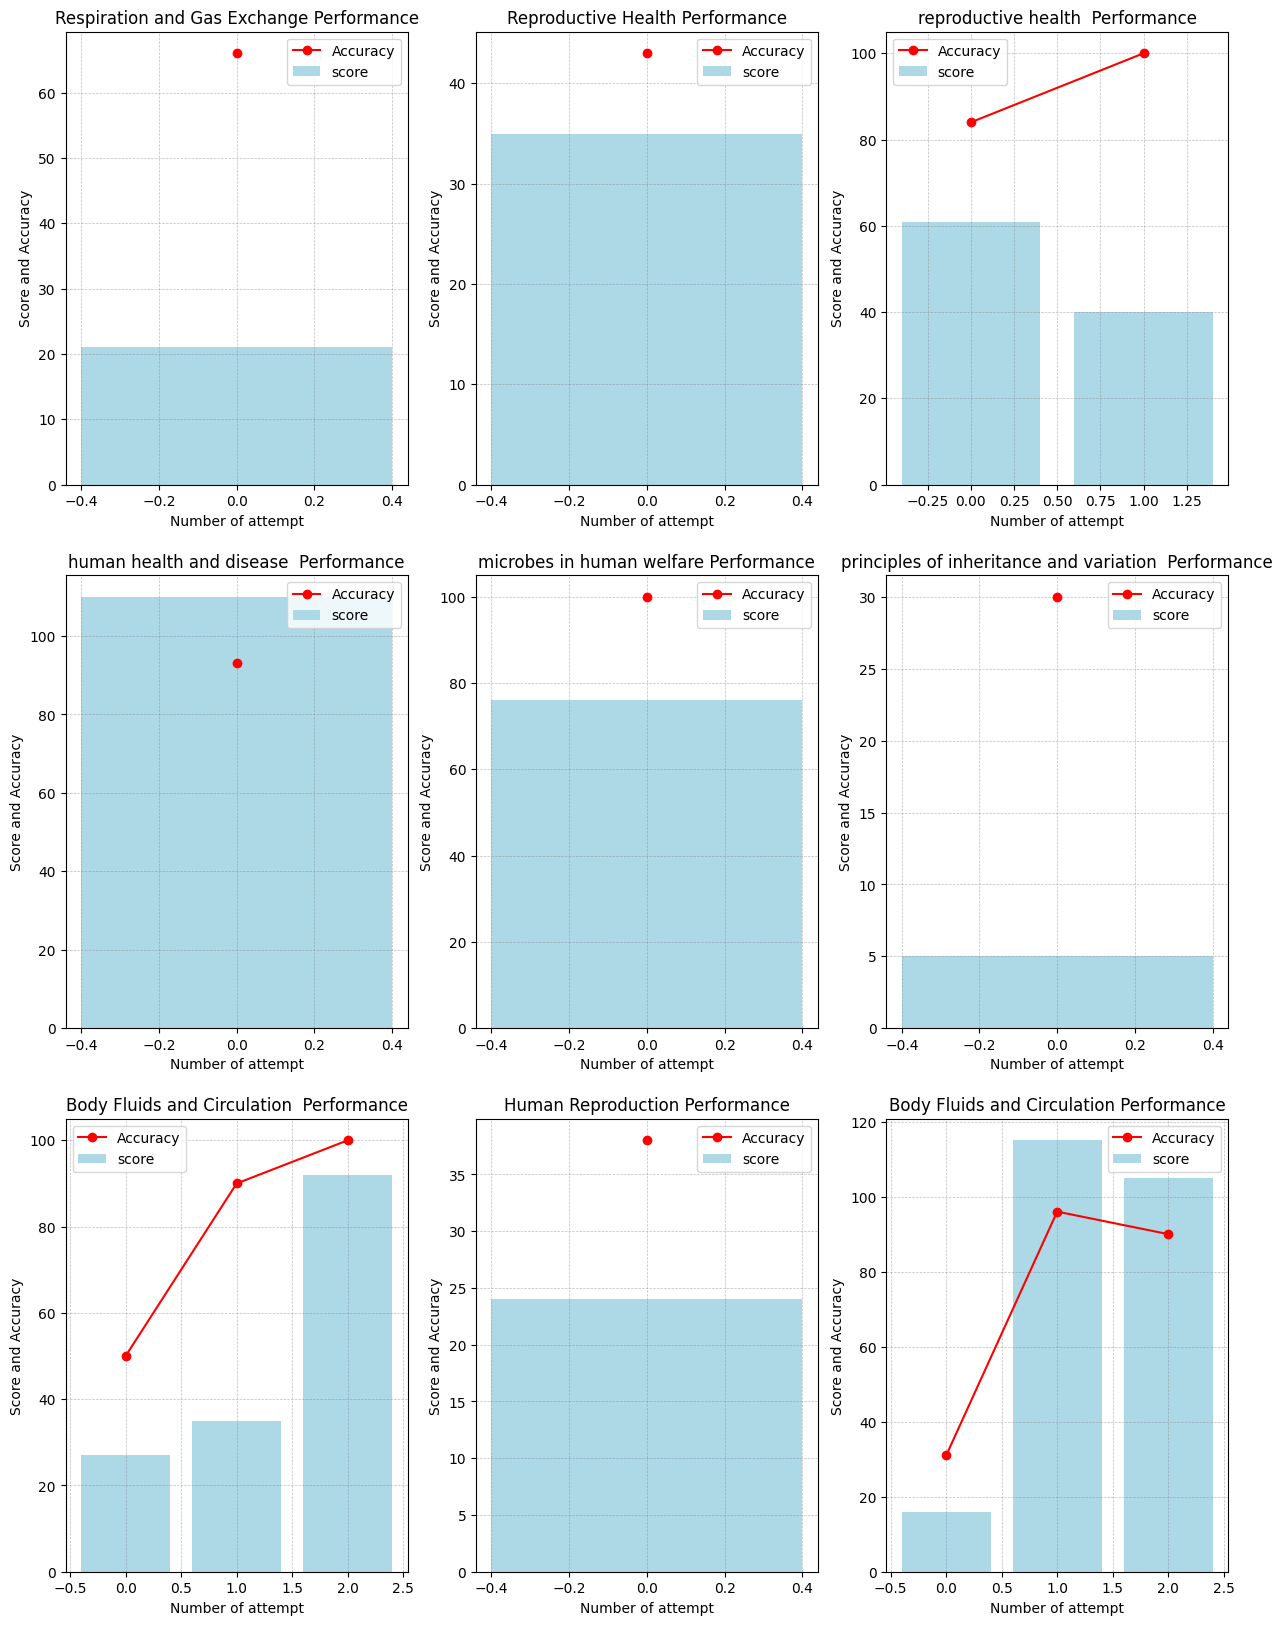

In [58]:
fig, axes = plt.subplots(len(topics) // 3, 3, figsize=(15, 20))
axes = axes.flatten()

for i, topic in enumerate(topics):
    ax = axes[i]
    topic_data = hist_data[hist_data['topic'] == topic]

    # making chart
    ax.bar(np.arange(len(topic_data)), topic_data.score, color = 'lightblue', label = 'score', zorder=1)
    ax.plot(np.arange(len(topic_data)), topic_data['acc'], color='red', marker='o', label='Accuracy', zorder=2)
    # ax.bar(topic_data.index, topic_data.score, color = 'lightblue', label = 'score')
    # ax.plot(topic_data.index, topic_data['acc'], color='red', marker='o', label='Accuracy')

    ax.set_title(f"{topic} Performance")
    ax.set_xlabel('Number of attempt')
    ax.set_ylabel('Score and Accuracy')
    ax.legend()
    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

    plt.savefig('images/topicwise_score.png')